In [1]:
import pandas as pd
import matplotlib.pyplot as plt 
from IPython.display import clear_output

from sklearn.metrics import confusion_matrix, auc, roc_curve
import itertools
import yaml
import os
import numpy as np
from statistics import mean
from datetime import datetime, timedelta
import time
from sklearn.metrics import precision_recall_curve, auc
import os
import sys
pd.options.display.max_rows = 999
pd.set_option('display.float_format', '{:.4f}'.format)


In [2]:
root_dir = os.path.abspath(os.path.join(os.path.dirname('see_all_expewriments.ipynb'), '..'))
os.chdir(root_dir)
sys.path.insert(0, os.path.join(root_dir, 'src'))

In [3]:
def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title='Matriz de Confusión',
                          cmap=plt.cm.Blues):
    """
    Esta función imprime y plotea la matriz de confusión.
    La normalización se puede aplicar configurando `normalize=True`.
    """
    cm = confusion_matrix(y_true, y_pred)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    plt.figure(figsize=(6, 4))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('Etiqueta Verdadera')
    plt.xlabel('Etiqueta Predicha')
    plt.tight_layout()

In [4]:
with open('configs/project_config.yml', 'r') as archivo:
    config = yaml.safe_load(archivo)

initial_wallet_value = config['start_money']


In [5]:
# root_path = 'C:/Users/SaidJ/OneDrive/Documentos/projects/forex_ml_bot/experiments 20240623'

# iteration = '1'
# path = 'Mode_train-Model_gradient_boosting-TrainWw_5760-TrainPd_24-TradStgy_ml_strategy-PerFwTg_8-SL_10-RR_2-CloseTime_True-TS_False'
 

# iteration = '2'
# path = 'Mode_train-Model_random_forest-TrainWw_1920-TrainPd_24-TradStgy_ml_strategy-PerFwTg_8-SL_10-RR_4-CloseTime_True-TS_False'


# iteration = '3'
# root_path = f'./backbone/data/backtest/experiments/{iteration}'

root_path = f'./backbone/data/backtest/experiments/'
path = 'TStgy_GridSmiAdxV2-PerFwTg_24-SL_100-RR_0.2-INT_2-TTIR_1-Lv_500-RP_3'

# path = 'Mode_train-Model_gradient_boosting-TrainWw_11520-TrainPd_24-TradStgy_bband_sell_stgy-PerFwTg_12-SL_15-RR_3-CloseTime_True-TS_False'


	
orders = pd.read_csv(os.path.join(root_path, path, 'orders.csv'))
wallet = pd.read_csv(os.path.join(root_path, path, 'wallet.csv'))


In [6]:
orders.head(50)

,id,ticker,operation_type,open_time,close_time,open_price,last_price,close_price,profit,stop_loss,take_profit,units,profit_in_pips,position_value,comment,pip_value,margin_required
0,f75e333a-5548-11ef-96db-9a176c43eaa6,USDCAD,OperationType.BUY,2018-02-19 16:00:00,2018-02-20 15:00:00,1.2587,1.2587,1.2607,5.9100,1.2487,1.2607,3000.0000,19.7000,3782.1000,ClosePositionType.TAKE_PROFIT,0.0001,7.5524
1,f770fe00-5548-11ef-9a02-9a176c43eaa6,USDCAD,OperationType.BUY,2018-02-20 00:00:00,2018-02-20 03:00:00,1.2562,1.2562,1.2582,6.1500,1.2462,1.2582,3000.0000,20.5000,3774.6000,ClosePositionType.TAKE_PROFIT,0.0001,7.5369
2,f7ede879-5548-11ef-8591-9a176c43eaa6,USDCAD,OperationType.BUY,2018-02-22 01:00:00,2018-02-22 15:00:00,1.2699,1.2699,1.2719,5.9813,1.2599,1.2719,3036.1800,19.7000,3861.7173,ClosePositionType.TAKE_PROFIT,0.0001,7.7115
3,f7f55f42-5548-11ef-8b40-9a176c43eaa6,USDCAD,OperationType.BUY,2018-02-22 04:00:00,2018-02-22 15:00:00,1.2694,1.2694,1.2714,5.9813,1.2594,1.2714,3036.1800,19.7000,3860.1993,ClosePositionType.TAKE_PROFIT,0.0001,7.7084
4,f7fca10e-5548-11ef-afd5-9a176c43eaa6,USDCAD,OperationType.BUY,2018-02-22 07:00:00,2018-02-22 10:00:00,1.2693,1.2693,1.2713,9.1541,1.2593,1.2713,4554.2700,20.1000,5789.8435,ClosePositionType.TAKE_PROFIT,0.0001,11.5614
5,f80b2706-5548-11ef-aa7d-9a176c43eaa6,USDCAD,OperationType.BUY,2018-02-22 13:00:00,2018-02-22 15:00:00,1.2687,1.2687,1.2707,9.0531,1.2587,1.2707,4595.4634,19.7000,5839.4553,ClosePositionType.TAKE_PROFIT,0.0001,11.6608
6,f902b734-5548-11ef-a680-9a176c43eaa6,USDCAD,OperationType.BUY,2018-02-28 18:00:00,2018-02-28 21:00:00,1.2806,1.2806,1.2826,6.3159,1.2706,1.2826,3126.6890,20.2000,4010.2914,ClosePositionType.TAKE_PROFIT,0.0001,8.0080
7,f9ab77d4-5548-11ef-8b67-9a176c43eaa6,USDCAD,OperationType.BUY,2018-03-05 16:00:00,2018-03-05 21:00:00,1.2976,1.2976,1.2996,6.1969,1.2876,1.2996,3145.6368,19.7000,4088.0696,ClosePositionType.TAKE_PROFIT,0.0001,8.1637
8,fbba20b6-5548-11ef-9738-9a176c43eaa6,USDCAD,OperationType.BUY,2018-03-16 14:00:00,2018-03-16 16:00:00,1.3076,1.3076,1.3096,6.2019,1.2976,1.3096,3164.2275,19.6000,4143.8723,ClosePositionType.TAKE_PROFIT,0.0001,8.2753
9,ffa30d8b-5548-11ef-b896-9a176c43eaa6,USDCAD,OperationType.SELL,2018-04-10 15:00:00,2018-04-10 16:00:00,1.2660,1.2660,1.2640,6.4930,1.2760,1.2640,3182.8331,20.4000,4023.1011,ClosePositionType.TAKE_PROFIT,0.0001,8.0592


In [7]:
ordersgb = pd.DataFrame(orders.groupby(by='close_time')['profit'].sum()).reset_index().rename(columns={'profit':'total_profit'})
ordersgb

first_orders = orders.drop_duplicates(subset='close_time', keep='first')
first_orders['hour'] = pd.to_datetime(first_orders['open_time']).dt.hour


merge = pd.merge(
    first_orders,
    ordersgb,
    on='close_time'
)

merge = merge[['open_time', 'hour','total_profit']]
merge['positive_ops'] = np.where(merge['total_profit']>0, 1,0)


# # Plotear los histogramas
# fig, ax = plt.subplots()

# # Filtrar los datos
# positive_ops = merge[merge['positive_ops'] == 1]['hour']
# negative_ops = merge[merge['positive_ops'] == 0]['hour']

# # Crear los histogramas
# ax.hist(positive_ops, bins=range(24), alpha=0.5, label='Positive Ops', color='blue')
# ax.hist(negative_ops, bins=range(24), alpha=0.5, label='Negative Ops', color='red')

# # Configurar el gráfico
# ax.set_xlabel('Hour')
# ax.set_ylabel('Frequency')
# ax.set_title('Histogram of Trading Hours')
# ax.legend()

# # Mostrar el gráfico
# plt.show()


C:\Users\SaidJ\AppData\Local\Temp\ipykernel_17756\2328735713.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  first_orders['hour'] = pd.to_datetime(first_orders['open_time']).dt.hour


In [8]:
first_orders.shape

(51, 18)

In [9]:
orders.profit.max()

100.68067

In [10]:
orders = orders.sort_values(by='close_time')

# Cantidad de compras y ventas

[]

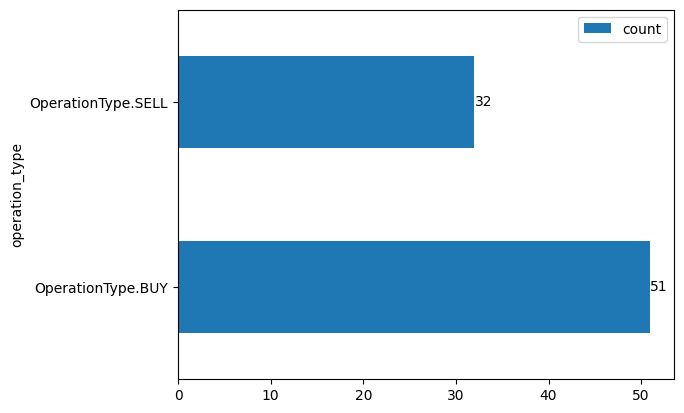

In [11]:
ax = pd.DataFrame(orders.operation_type.value_counts()).plot.barh()
ax.bar_label(ax.containers[0])
ax.plot()

# Compras que salieron bien

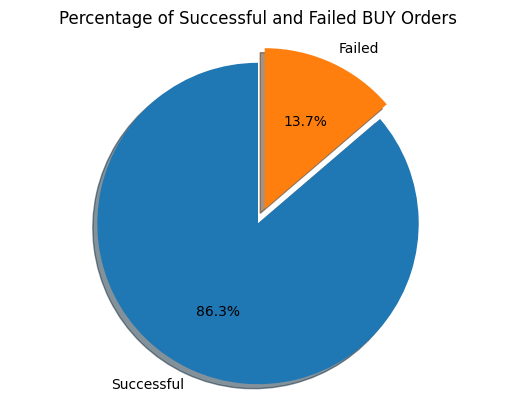

In [12]:
try:
    # Calcular el número de operaciones exitosas y fallidas
    successful_buys = orders[(orders['operation_type'] == 'OperationType.BUY') & (orders['profit'] >= 0)].shape[0]
    failed_buys = orders[(orders['operation_type'] == 'OperationType.BUY') & (orders['profit'] < 0)].shape[0]
    
    # Calcular los porcentajes
    total_buys = successful_buys + failed_buys
    percent_successful = (successful_buys / total_buys) * 100
    percent_failed = (failed_buys / total_buys) * 100
    
    # Crear un gráfico de torta
    labels = 'Successful', 'Failed'
    sizes = [percent_successful, percent_failed]
    explode = (0.1, 0)  # Explode the first slice (i.e., 'Successful')
    
    fig1, ax1 = plt.subplots()
    ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
            shadow=True, startangle=90)
    ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
    
    plt.title('Percentage of Successful and Failed BUY Orders')
    plt.show()
except:
    print('no hay compras')

# Ventas que salieron bien

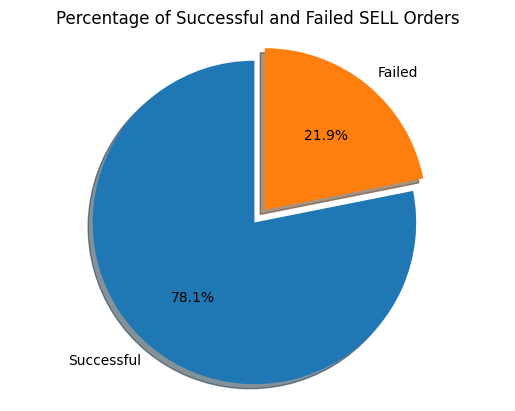

In [13]:
# Calcular el número de operaciones exitosas y fallidas
successful_buys = orders[(orders['operation_type'] == 'OperationType.SELL') & (orders['profit'] >= 0)].shape[0]
failed_buys = orders[(orders['operation_type'] == 'OperationType.SELL') & (orders['profit'] < 0)].shape[0]

# Calcular los porcentajes
total_buys = successful_buys + failed_buys
percent_successful = (successful_buys / total_buys) * 100
percent_failed = (failed_buys / total_buys) * 100

# Crear un gráfico de torta
labels = 'Successful', 'Failed'
sizes = [percent_successful, percent_failed]
explode = (0.1, 0)  # Explode the first slice (i.e., 'Successful')

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.title('Percentage of Successful and Failed SELL Orders')
plt.show()

# Cierres por SL y TP

In [14]:
# ax = pd.DataFrame(orders.comment.value_counts()).plot.barh()
# ax.bar_label(ax.containers[0])
# ax.plot()

# Operaciones que cerraron por dias y quedaron positivas

In [15]:
# total_days = orders[orders['comment'] == 'ClosePositionType.DAYS']
# positive_days = total_days[total_days['profit'] >= 0]
# negative_days = total_days[total_days['profit'] < 0]

# # Calcula los tamaños
# total_count = total_days.shape[0]
# positive_count = positive_days.shape[0]
# negative_count = negative_days.shape[0]

# # Calcula los porcentajes
# positive_percentage = (positive_count / total_count) * 100
# negative_percentage = (negative_count / total_count) * 100

# # Crea los datos para el gráfico de torta
# labels = ['Positive', 'Negative']
# sizes = [positive_percentage, negative_percentage]

# explode = (0.1, 0)  # Explode the first slice (i.e., 'Successful')

# fig1, ax1 = plt.subplots()
# ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
#         shadow=True, startangle=90)
# ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

# plt.title('Percentage of Successful and Failed SELL Orders')
# plt.show()

# Cierres por SL que terminaron positivos

In [16]:
# print(orders[(orders['comment']=='ClosePositionType.STOP_LOSS') & (orders['profit']>=0)].shape[0])
# orders[(orders['comment']=='ClosePositionType.STOP_LOSS') & (orders['profit']>=0)].shape[0] / orders[(orders['comment']=='ClosePositionType.STOP_LOSS')].shape[0]

# Cierres por SL en que se minimizaron las perdidas

In [17]:
# print(orders[(orders['comment']=='ClosePositionType.STOP_LOSS') & (orders['last_price']!=orders['open_price'])].shape[0])
# orders[(orders['comment']=='ClosePositionType.STOP_LOSS') & (orders['last_price']!=orders['open_price'])].shape[0] / orders[(orders['comment']=='ClosePositionType.STOP_LOSS')].shape[0]

# Desempenio por ticker

In [18]:
orders_by_ticker = orders.groupby('ticker').agg(
    positivas=('profit', lambda x: (x > 0).sum()),
    negativas=('profit', lambda x: (x < 0).sum()),
    profit=('profit', lambda x: (x).sum()),
).reset_index()

orders_by_ticker['perc'] = (orders_by_ticker['positivas'] / (orders_by_ticker['positivas'] + orders_by_ticker['negativas'])) * 100
orders_by_ticker.sort_values(by='perc', ascending=False)

,ticker,positivas,negativas,profit,perc
0,USDCAD,69,14,770.1907,83.1325


# Rendimiento por mes

In [19]:
orders_per_month = orders[['close_time','profit', 'comment']].copy()

orders['close_time'] = pd.to_datetime(orders['close_time'])
orders_per_month['close_time'] = orders['close_time'].dt.to_period('M')


orders_per_month_gb = orders_per_month.groupby(by=['close_time']).agg(
    amount_ops=('profit', 'count'),
    good_ops=('profit', lambda x: (x > 0).sum()),
    bad_ops=('profit', lambda x: (x < 0).sum()),
    take_profit=('comment', lambda x: (x == 'ClosePositionType.TAKE_PROFIT').sum()),
    stop_loss=('comment', lambda x: (x == 'ClosePositionType.STOP_LOSS').sum()),
    profit_sum=('profit', 'sum'),
    max_profit=('profit', 'max'),

).reset_index()

orders_per_month_gb = pd.concat([
    pd.DataFrame({'close_time':['2015-12'],'amount_ops':[0], 'profit_sum':[initial_wallet_value]}), 
    orders_per_month_gb
])

orders_per_month_gb['profit_cumsum'] = orders_per_month_gb['profit_sum'].cumsum()

orders_per_month_gb['perc_change'] = ((orders_per_month_gb['profit_cumsum'] - orders_per_month_gb['profit_cumsum'].shift(1)) / orders_per_month_gb['profit_cumsum'].shift(1))

orders_per_month_gb['perc_change'] = orders_per_month_gb['perc_change'].round(3)
orders_per_month_gb['perc_change_cumsum'] = orders_per_month_gb['perc_change'].cumsum()

orders_per_month_gb['perc_good_ops'] = (orders_per_month_gb['good_ops'] / orders_per_month_gb['amount_ops'])

orders_per_month_gb[[
    'close_time', 
    'amount_ops', 
    'take_profit',
    'stop_loss',
    'good_ops', 
    'bad_ops',
    'perc_good_ops',
    'max_profit', 
    'profit_sum', 
    'profit_cumsum', 
    'perc_change', 
    'perc_change_cumsum'
]].round(3)

,close_time,amount_ops,take_profit,stop_loss,good_ops,bad_ops,perc_good_ops,max_profit,profit_sum,profit_cumsum,perc_change,perc_change_cumsum
0,2015-12,0,NaN,NaN,NaN,NaN,NaN,NaN,1000.0000,1000.0000,NaN,NaN
0,2018-02,7,7.0000,0.0000,7.0000,0.0000,1.0000,9.1540,48.5460,1048.5460,0.0490,0.0490
1,2018-03,2,2.0000,0.0000,2.0000,0.0000,1.0000,6.2020,12.3990,1060.9440,0.0120,0.0610
2,2018-04,1,1.0000,0.0000,1.0000,0.0000,1.0000,6.4930,6.4930,1067.4370,0.0060,0.0670
3,2018-05,2,1.0000,1.0000,1.0000,1.0000,0.5000,6.2770,-25.9350,1041.5020,-0.0240,0.0430
4,2018-08,1,1.0000,0.0000,1.0000,0.0000,1.0000,6.3430,6.3430,1047.8450,0.0060,0.0490
5,2019-03,4,4.0000,0.0000,4.0000,0.0000,1.0000,6.4130,25.3440,1073.1890,0.0240,0.0730
6,2019-04,12,5.0000,0.0000,8.0000,4.0000,0.6670,65.1830,217.8360,1291.0250,0.2030,0.2760
7,2019-05,2,2.0000,0.0000,2.0000,0.0000,1.0000,7.8620,15.6080,1306.6330,0.0120,0.2880
8,2019-06,2,2.0000,0.0000,2.0000,0.0000,1.0000,7.7220,15.4050,1322.0390,0.0120,0.3000


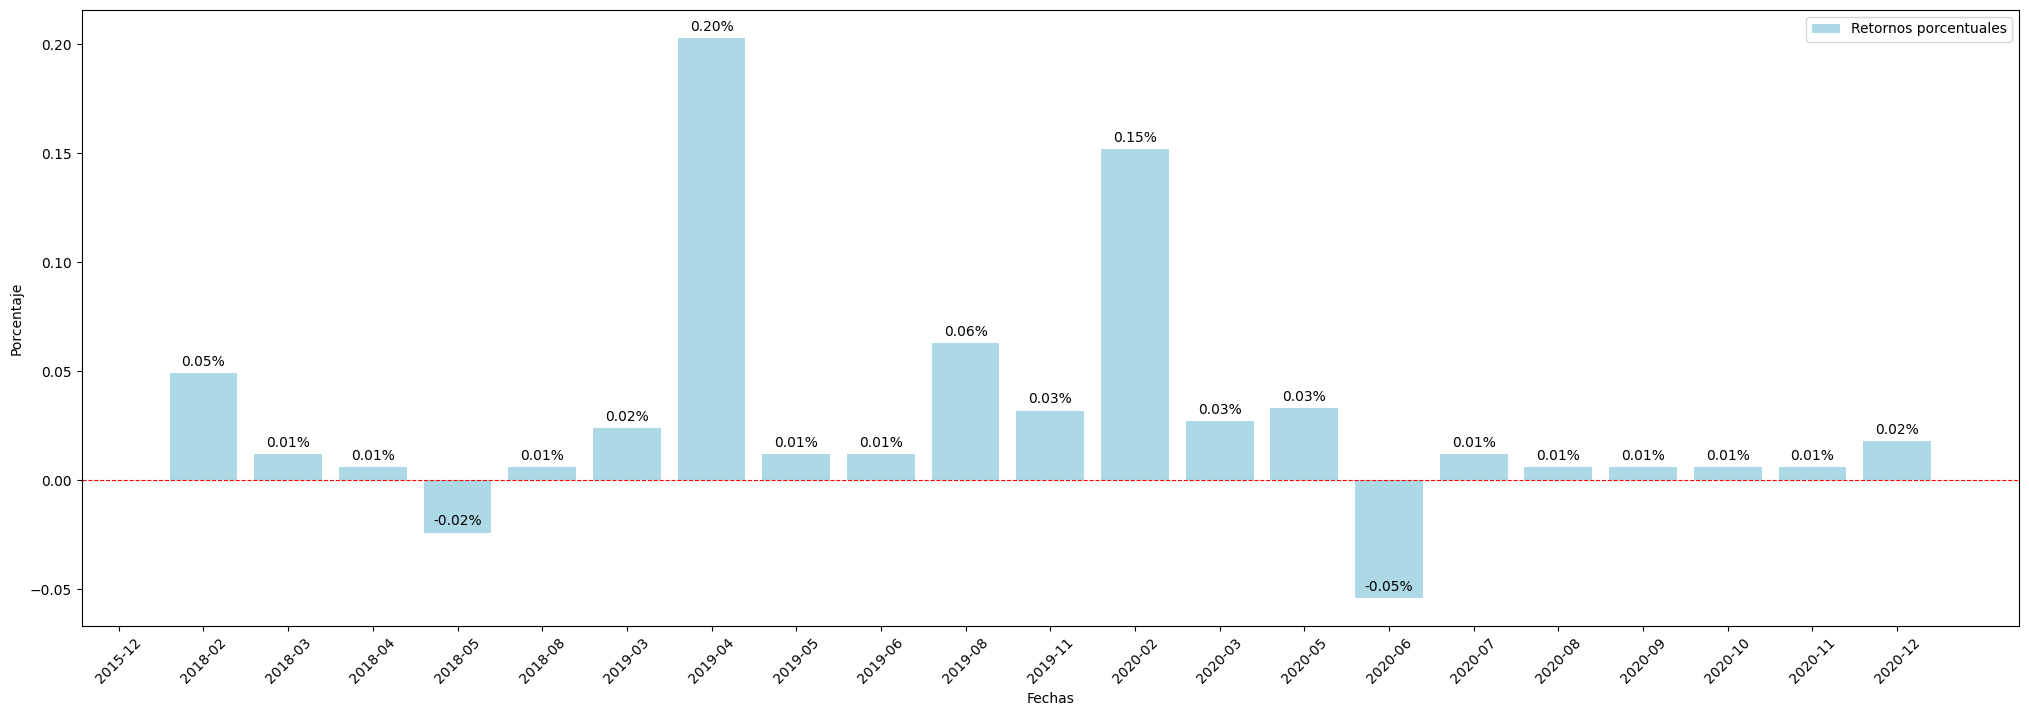

In [20]:
import matplotlib.pyplot as plt

# Datos de ejemplo
grow_perc = orders_per_month_gb[['close_time', 'perc_change']]
fig, ax = plt.subplots(figsize=(25, 8))

x = grow_perc['close_time'].astype(str)
y = grow_perc['perc_change']

# Crear barras
bars = ax.bar(x, y, label='Retornos porcentuales', color='lightblue')

# Agregar etiquetas sobre las barras
for bar in bars:
    height = bar.get_height()
    ax.annotate(f'{height:.2f}%',
                xy=(bar.get_x() + bar.get_width() / 2, height),
                xytext=(0, 3),  # 3 puntos de desplazamiento vertical
                textcoords="offset points",
                ha='center', va='bottom')

# Agregar una línea de puntos horizontal en el valor 0
ax.axhline(0, color='red', linewidth=0.8, linestyle='--')

# Etiquetas de los ejes y leyenda
ax.set_xlabel('Fechas')
ax.set_ylabel('Porcentaje')
ax.legend()

plt.xticks(rotation=45)

# Mostrar el gráfico
plt.show()


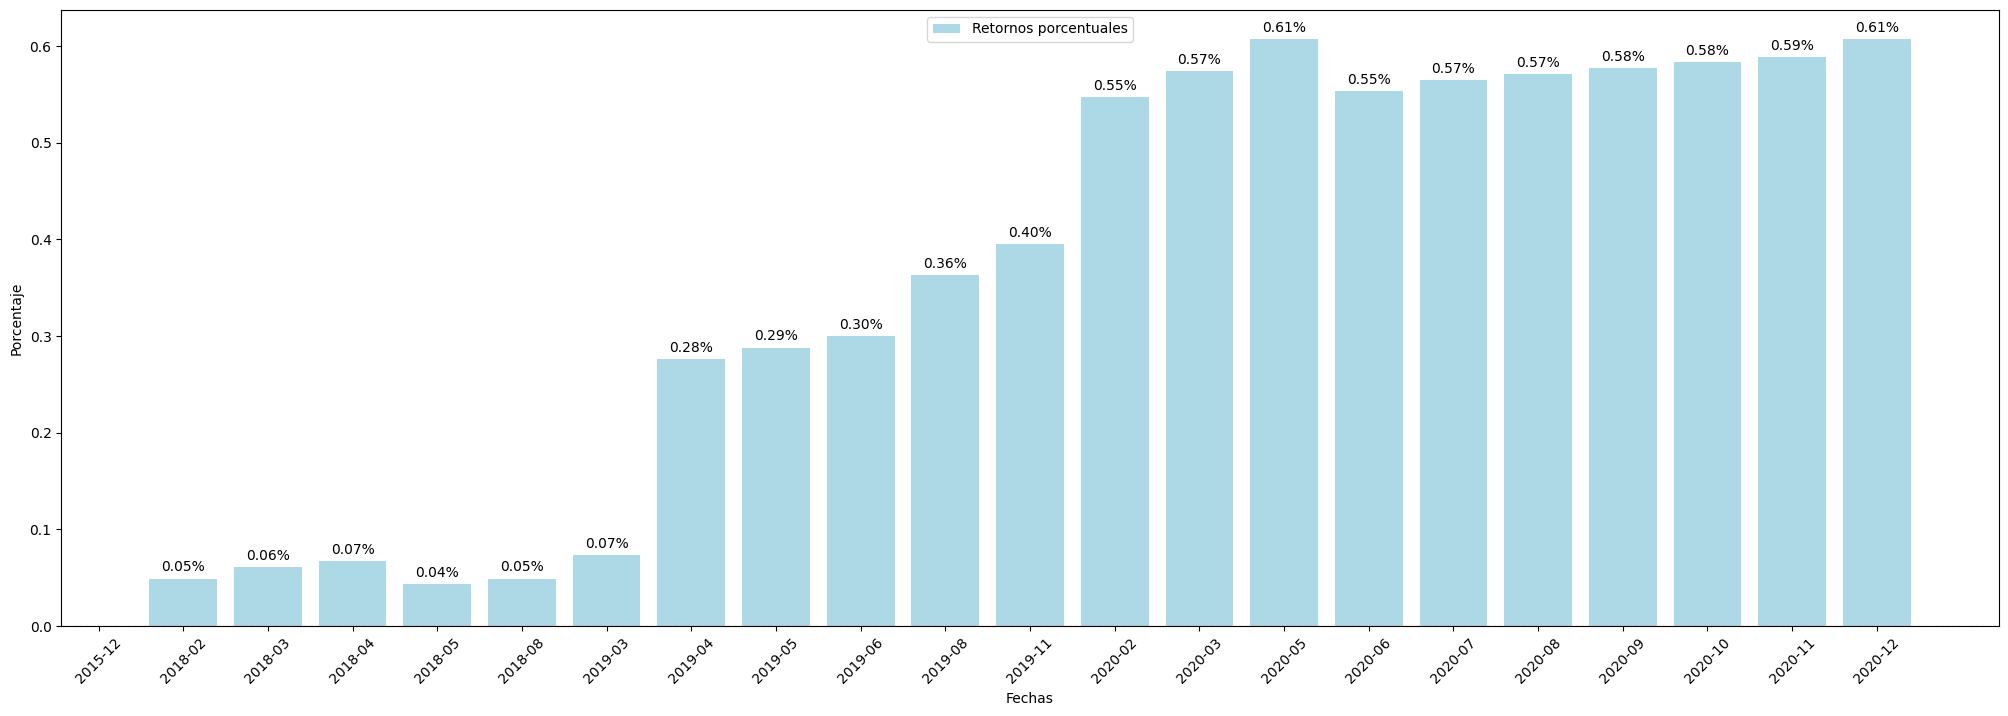

In [21]:
import matplotlib.pyplot as plt

# Datos de ejemplo
grow_perc = orders_per_month_gb[['close_time', 'perc_change_cumsum']]
fig, ax = plt.subplots(figsize=(25, 8))

x = grow_perc['close_time'].astype(str)
y = grow_perc['perc_change_cumsum']

# Crear barras
bars = ax.bar(x, y, label='Retornos porcentuales', color='lightblue')

# Agregar etiquetas sobre las barras
for bar in bars:
    height = bar.get_height()
    ax.annotate(f'{height:.2f}%',
                xy=(bar.get_x() + bar.get_width() / 2, height),
                xytext=(0, 3),  # 3 puntos de desplazamiento vertical
                textcoords="offset points",
                ha='center', va='bottom')

# Agregar una línea de puntos horizontal en el valor 0
ax.axhline(0, color='red', linewidth=0.8, linestyle='--')

# Etiquetas de los ejes y leyenda
ax.set_xlabel('Fechas')
ax.set_ylabel('Porcentaje')
ax.legend()

plt.xticks(rotation=45)

# Mostrar el gráfico
plt.show()


In [22]:
# Crear una columna que indique si la operación fue una pérdida
merge['is_loss'] = merge['total_profit'] < 0
# Crear una columna que cuente las rachas de pérdidas consecutivas
merge['consecutive_losses'] = merge['is_loss'].cumsum() - merge['is_loss'].cumsum().where(~merge['is_loss']).ffill().fillna(0).astype(int)

# Encontrar la máxima cantidad de pérdidas consecutivas
max_consecutive_losses = merge['consecutive_losses'].max()

print(f"La cantidad máxima de pérdidas consecutivas es: {max_consecutive_losses}")


La cantidad máxima de pérdidas consecutivas es: 1


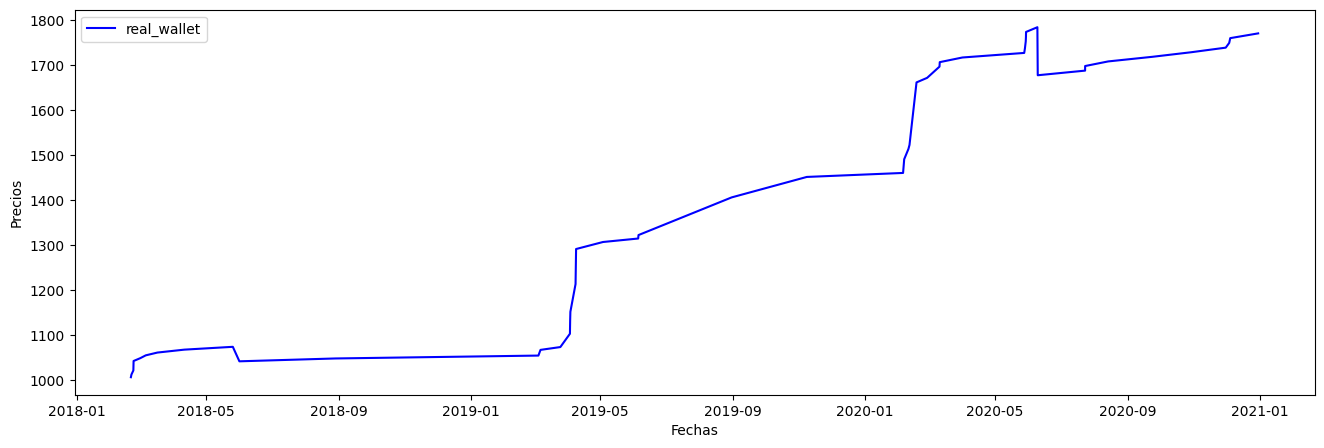

In [23]:
import matplotlib.pyplot as plt
import numpy as np

fig, ax = plt.subplots(figsize=(16, 5))

# Datos de ejemplo
x_wallet = pd.to_datetime(wallet['date'])
y_wallet = wallet['wallet']  # Datos para la línea
# Crear una figura y ejes
# Agregar la línea
ax.plot(x_wallet, y_wallet, label='real_wallet', color='blue')

# Etiquetas de los ejes y leyenda
ax.set_xlabel('Fechas')
ax.set_ylabel('Precios')
ax.legend()

# Mostrar el gráfico
plt.show()


In [24]:
wallet.tail(1)

,date,wallet
50,2020-12-30 17:00:00,1770.1907


In [25]:
# orders_per_month_ticker = orders[['close_time','profit', 'comment', 'ticker']].copy()
# orders_per_month_ticker['close_time'] = pd.to_datetime(orders_per_month_ticker['close_time'])
# orders_per_month_ticker['close_time'] = orders_per_month_ticker['close_time'].dt.to_period('M').astype(str)

# profit_per_ticker = pd.DataFrame(orders_per_month_ticker.groupby(by=['ticker', 'close_time'])['profit'].sum()).reset_index()
# all_dates = pd.date_range(start=profit_per_ticker['close_time'].min(), end=profit_per_ticker['close_time'].max(), freq='M').astype(str)

# # Crea un DataFrame vacío con el rango de fechas para cada ticker
# full_index = pd.MultiIndex.from_product([profit_per_ticker['ticker'].unique(), all_dates], names=['ticker', 'close_time'])
# full_df = pd.DataFrame(index=full_index).reset_index()
# full_df['close_time'] = pd.to_datetime(full_df['close_time'])
# full_df['close_time'] = full_df['close_time'].dt.to_period('M').astype(str)

# # Combina el DataFrame completo con el original
# merged_df = pd.merge(full_df, profit_per_ticker, on=['ticker', 'close_time'], how='left')

# # Rellena los valores faltantes con ceros o NaNs
# merged_df['profit'] = merged_df['profit'].fillna(method='ffill')
# # merged_df['profit'] = merged_df['profit'].fillna(method='ffill')

# # Asegúrate de que los datos estén ordenados por ticker y close_time
# merged_df = merged_df.sort_values(by=['ticker', 'close_time'])



# plt.figure(figsize=(12, 5))

# # Dibuja cada ticker por separado
# for ticker in merged_df['ticker'].unique():
#     ticker_data = merged_df[merged_df['ticker'] == ticker]
#     plt.plot(ticker_data['close_time'].astype(str), ticker_data['profit'], marker='o', label=ticker)

# # Añade títulos y etiquetas
# plt.title('Evolución de las Ganancias por Ticker en el Tiempo')
# plt.xlabel('Fecha')
# plt.ylabel('Ganancia')
# plt.legend(title='Ticker')

# # Muestra el gráfico
# plt.show()



In [26]:
orders_per_month_gb.perc_change.mean()

0.028904761904761905

In [27]:
orders_per_month_gb.perc_change.std()

0.055300908457189706

In [28]:
change_percent = orders_per_month_gb.perc_change.reset_index().copy().drop(columns='index')
change_percent.fillna(0, inplace=True)

# Inicializar el valor de partida
initial_value = 3000

# Crear una columna para la suma acumulada
change_percent['cumulative_sum'] = initial_value

# Calcular la suma acumulada basada en los porcentajes
for i in range(1, len(change_percent)):
    change_percent.loc[i, 'cumulative_sum'] = change_percent.loc[i-1, 'cumulative_sum'] * (1 + change_percent.loc[i, 'perc_change'])

change_percent

,perc_change,cumulative_sum
0,0.0000,3000.0000
1,0.0490,3147.0000
2,0.0120,3184.7640
3,0.0060,3203.8726
4,-0.0240,3126.9796
5,0.0060,3145.7415
6,0.0240,3221.2393
7,0.2030,3875.1509
8,0.0120,3921.6527
9,0.0120,3968.7125


first_order_time: 2018-08-28 15:00:00
close_order_time: 2018-08-28 16:00:00
total_profit: 6.34275
2018-08-26 15:00:00
2018-08-30 16:00:00


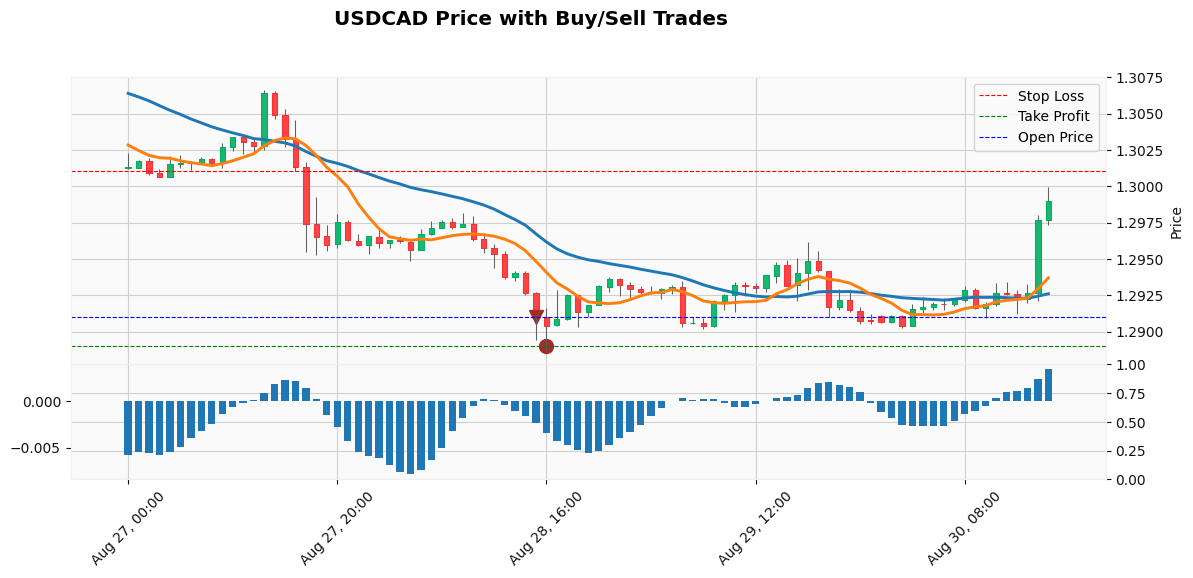

2018-08-26 15:00:00 2018-08-30 16:00:00


In [ ]:
import pandas as pd
import numpy as np
import mplfinance as mpf
import matplotlib.pyplot as plt
from datetime import timedelta


for ticker in ['USDCAD']:
    # Cargar los datos de precios históricos
    prices = pd.read_csv(f'./backbone/data/backtest/symbols/{ticker}.csv')
    
    # Convertir las columnas de fechas a formato datetime
    prices['Date'] = pd.to_datetime(prices['Date'])
    orders['close_time'] = pd.to_datetime(orders['close_time'])
    orders['open_time'] = pd.to_datetime(orders['open_time'])
    
    orders_close_times = orders.close_time.unique()
    
    for order_close_date in orders_close_times:
        close_orders = orders[(orders.close_time == order_close_date) & (orders.ticker == ticker) & (~orders.close_time.isna())]
        total_profit = close_orders['profit'].sum()
        first_order_time = close_orders.open_time.min()
        close_order_time = close_orders.close_time.max()

        print(f'first_order_time: {first_order_time}')
        print(f'close_order_time: {close_order_time}')
        print(f'total_profit: {total_profit}')
        
        min_date = close_orders.open_time.min()

        date_from = min_date - timedelta(hours=48)
        date_to = order_close_date + timedelta(hours=48)

        print(date_from)
        print(date_to)

        # Filtrar los precios históricos para el rango de fechas relevante
        historical_prices = prices[
            (prices['Date'] >= date_from) &
            (prices['Date'] <= date_to)
        ].copy()
    
        historical_prices.set_index('Date', inplace=True)
    
        # Crear las listas de anotaciones inicializadas con NaN
        open_annotations = [np.nan] * len(historical_prices)
        close_annotations = [np.nan] * len(historical_prices)
    
        # Buscar las posiciones correspondientes a las fechas de las operaciones

        for index, order in close_orders.iterrows():
            if order.open_time in historical_prices.index:
                open_annotations[historical_prices.index.get_loc(order.open_time)] = order.open_price
            if order.close_time in historical_prices.index:
                close_annotations[historical_prices.index.get_loc(order.close_time)] = order.close_price
    
            if order.operation_type == 'OperationType.BUY':
                color_open = 'green'
                color_close = 'lime'
                marker_open = '^'  # Flecha hacia arriba
                marker_close = 'o'  # Círculo
            else:
                color_open = 'brown'
                color_close = 'brown'
                marker_open = 'v'  # Flecha hacia abajo
                marker_close = 'o'  # Círculo
    
        # Crear los addplot
        opens = mpf.make_addplot(open_annotations, type='scatter', markersize=100, marker=marker_open, color=color_open)
        closes = mpf.make_addplot(close_annotations, type='scatter', markersize=100, marker=marker_close, color=color_close)
        sqz = mpf.make_addplot(historical_prices['SQZ'],type='bar',width=0.7,panel=1,alpha=1,secondary_y=True)

        sma26 = mpf.make_addplot(historical_prices['sma_26'])
        sma9 = mpf.make_addplot(historical_prices['sma_9'])
        # sma12 = mpf.make_addplot(historical_prices['sma_12'])
        # upper_bband = mpf.make_addplot(historical_prices['upper_bband'])
        # lower_bband = mpf.make_addplot(historical_prices['lower_bband'])
        # aroon = mpf.make_addplot((historical_prices.upper_bband), panel=1,color='g')
        # adx = mpf.make_addplot((historical_prices.lower), panel=2,color='r')

        
        # Crear el gráfico de velas japonesas con mplfinance
        fig, axlist = mpf.plot(
            historical_prices, 
            type='candle', 
            style='yahoo', 
            returnfig=True, 
            volume=False, 
            title=f'{ticker} Price with Buy/Sell Trades', 
            figratio=(15,6),
            addplot=[opens, closes, sqz, sma26, sma9]
        )
    
        # Agregar las operaciones al gráfico
        ax = axlist[0]  # Acceder al primer subplot, que contiene el gráfico de velas
        # Agregar líneas horizontales para stop loss, take profit y precio de apertura
        ax.axhline(order.stop_loss, color='red', linewidth=0.8, linestyle='--', label='Stop Loss')
        ax.axhline(order.take_profit, color='green', linewidth=0.8, linestyle='--', label='Take Profit')
        ax.axhline(order.open_price, color='blue', linewidth=0.8, linestyle='--', label='Open Price')
    
        # Añadir etiquetas y leyenda
        handles, labels = ax.get_legend_handles_labels()
        by_label = dict(zip(labels, handles))
        ax.legend(by_label.values(), by_label.keys())
        
        plt.xticks(rotation=45)
    
        plt.show()
        
        print(date_from, date_to)
        
        a = input()  # Pausa para la interacción del usuario
        clear_output()
        
        plt.close(fig)  # Cerrar la figura para la siguiente iteración


In [ ]:
import pandas as pd
import numpy as np
import mplfinance as mpf
import matplotlib.pyplot as plt
from datetime import timedelta


for ticker in ['EURUSD', 'GBPUSD', 'USDJPY', 'USDCAD', 'AUDUSD', 'USDCHF']:
    # Cargar los datos de precios históricos
    prices = pd.read_csv(f'./backbone/data/backtest/symbols/{ticker}.csv')
    
    # Convertir las columnas de fechas a formato datetime
    prices['Date'] = pd.to_datetime(prices['Date'])
    orders['close_time'] = pd.to_datetime(orders['close_time'])
    orders['open_time'] = pd.to_datetime(orders['open_time'])

    orders_close_time = orders.close_time.unique()
    
    for order_close_date in orders_close_time:
        close_orders = orders[(orders.close_time == order_close_date) & (orders.ticker == ticker)]
        min_date = close_orders.open_time.min()
        
        
        date_from = min_date - timedelta(hours=48)
        date_to = order_close_date + timedelta(hours=48)

        # Filtrar los precios históricos para el rango de fechas relevante
        historical_prices = prices[
            (prices['Date'] >= date_from) &
            (prices['Date'] <= date_to)
        ].copy()
    
        historical_prices.set_index('Date', inplace=True)
    
        # Crear las listas de anotaciones inicializadas con NaN
        open_annotations = [np.nan] * len(historical_prices)
        close_annotations = [np.nan] * len(historical_prices)
    
        # Buscar las posiciones correspondientes a las fechas de las operaciones

        print(close_orders)
        for order in close_orders.iterrows():
            if order.open_time in historical_prices.index:
                open_annotations[historical_prices.index.get_loc(order.open_time)] = order.open_price
            if order.close_time in historical_prices.index:
                close_annotations[historical_prices.index.get_loc(order.close_time)] = order.close_price
    
            if order.operation_type == 'OperationType.BUY':
                color_open = 'green'
                color_close = 'lime'
                marker_open = '^'  # Flecha hacia arriba
                marker_close = 'o'  # Círculo
            else:
                color_open = 'brown'
                color_close = 'brown'
                marker_open = 'v'  # Flecha hacia abajo
                marker_close = 'o'  # Círculo
    
        # Crear los addplot
        opens = mpf.make_addplot(open_annotations, type='scatter', markersize=100, marker=marker_open, color=color_open)
        closes = mpf.make_addplot(close_annotations, type='scatter', markersize=100, marker=marker_close, color=color_close)
        sqz = mpf.make_addplot(historical_prices['SQZ'],type='bar',width=0.7,panel=1,alpha=1,secondary_y=True)

        # sma = mpf.make_addplot(historical_prices['sma_200'])
        # upper_bband = mpf.make_addplot(historical_prices['upper_bband'])
        # lower_bband = mpf.make_addplot(historical_prices['lower_bband'])
        # aroon = mpf.make_addplot((historical_prices.upper_bband), panel=1,color='g')
        # adx = mpf.make_addplot((historical_prices.lower), panel=2,color='r')

        
        # Crear el gráfico de velas japonesas con mplfinance
        fig, axlist = mpf.plot(
            historical_prices, 
            type='candle', 
            style='yahoo', 
            returnfig=True, 
            volume=False, 
            title=f'{ticker} Price with Buy/Sell Trades', 
            figratio=(15,6),
            addplot=[opens, closes, sqz]
        )
    
        # Agregar las operaciones al gráfico
        ax = axlist[0]  # Acceder al primer subplot, que contiene el gráfico de velas
        # Agregar líneas horizontales para stop loss, take profit y precio de apertura
        ax.axhline(order.stop_loss, color='red', linewidth=0.8, linestyle='--', label='Stop Loss')
        ax.axhline(order.take_profit, color='green', linewidth=0.8, linestyle='--', label='Take Profit')
        ax.axhline(order.open_price, color='blue', linewidth=0.8, linestyle='--', label='Open Price')
    
        # Añadir etiquetas y leyenda
        handles, labels = ax.get_legend_handles_labels()
        by_label = dict(zip(labels, handles))
        ax.legend(by_label.values(), by_label.keys())
        
        plt.xticks(rotation=45)
        print(order)
    
        plt.show()
        
        print(date_from, date_to)
        
        a = input()  # Pausa para la interacción del usuario
        clear_output()
        
        plt.close(fig)  # Cerrar la figura para la siguiente iteración


In [ ]:
orders.open_time = pd.to_datetime(orders.open_time)

losses = orders[(orders.comment == 'ClosePositionType.STOP_LOSS')].copy()
wins = orders[(orders.comment == 'ClosePositionType.TAKE_PROFIT')].copy()
wins['open_time'] = wins.open_time.dt.hour
losses['open_time'] = losses.open_time.dt.hour

plt.figure(figsize=(14, 5))

# plotting first histogram
plt.hist(wins['open_time'], label='wins', alpha=.8, edgecolor='black', bins=24)

# plotting second histogram
plt.hist(losses['open_time'], label='losses', alpha=0.7, bins=24)
plt.legend()

# Showing the plot using plt.show()
plt.show()


In [ ]:
orders.open_time = pd.to_datetime(orders.open_time)

orders_tp = orders[(orders.comment == 'ClosePositionType.TAKE_PROFIT')].copy()
orders_sl = orders[(orders.comment == 'ClosePositionType.STOP_LOSS')].copy()

orders_time_win = orders[(orders.comment == 'ClosePositionType.DAYS') & (orders.profit < 0)].copy()
orders_time_loss = orders[(orders.comment == 'ClosePositionType.DAYS') & (orders.profit >= 0 )].copy()

orders_tp['open_time'] = orders_tp.open_time.dt.hour
orders_sl['open_time'] = orders_sl.open_time.dt.hour
orders_time_win['open_time'] = orders_time_win.open_time.dt.hour
orders_time_loss['open_time'] = orders_time_loss.open_time.dt.hour

plt.figure(figsize=(14, 5))

# plotting first histogram
plt.hist(orders_tp['open_time'], label='tp', alpha=.8, edgecolor='black', bins=24)
plt.hist(orders_sl['open_time'], label='sl', alpha=0.7, bins=24)
plt.hist(orders_time_win['open_time'], label='time_win', alpha=0.7, bins=24)
plt.hist(orders_time_loss['open_time'], label='time_loss', alpha=0.7, bins=24)

plt.legend()

# Showing the plot using plt.show()
plt.show()


In [ ]:
orders_per_month = orders[['close_time','comment', 'ticker', 'profit']].copy()
orders_per_month['close_time'] = pd.to_datetime(orders_per_month['close_time'])
orders_per_month['year'] = orders_per_month['close_time'].dt.year
orders_per_month['month'] = orders_per_month['close_time'].dt.month
orders_per_month['day'] = orders_per_month['close_time'].dt.day

orders_per_month_gb = orders_per_month.groupby(by=['year','month', 'day']).agg(
    take_profit=('comment', lambda x: (x == 'ClosePositionType.TAKE_PROFIT').sum()),
    stop_loss=('comment', lambda x: (x == 'ClosePositionType.STOP_LOSS').sum()),
    profit=('profit', lambda x: (x).sum()),

)

orders_per_month_gb['tp_cumsum'] = orders_per_month_gb.groupby(by=['year','month'])['take_profit'].cumsum()
orders_per_month_gb['sl_cumsum'] = orders_per_month_gb.groupby(by=['year','month'])['stop_loss'].cumsum()
orders_per_month_gb['profit_cumsum'] = orders_per_month_gb.groupby(by=['year','month'])['profit'].cumsum()
orders_per_month_gb

# Que hubiera pasado si no se operaba con algunos tickers?

In [ ]:
# tickers_permitidos = orders_by_ticker[orders_by_ticker['profit']>0].ticker.unique()
# print(tickers_permitidos)

tickers_permitidos = [
    'EURUSD', 
    'GBPUSD', 
    # 'USDJPY', 
    # 'USDCAD', 
    # 'AUDUSD', 
    # 'USDCHF'
]

orders_min = orders[orders['ticker'].isin(tickers_permitidos)].copy().reset_index()

# Rendimiento por mes

In [ ]:
orders_min['close_month'] = pd.to_datetime(orders_min['close_time'])
orders_min['close_month'] = orders_min['close_month'].dt.to_period('M')

orders_per_month_gb = orders_min.groupby(by=['close_month']).agg(
    amount_ops=('profit', 'count'),
    good_ops=('profit', lambda x: (x > 0).sum()),
    bad_ops=('profit', lambda x: (x < 0).sum()),
    take_profit=('comment', lambda x: (x == 'ClosePositionType.TAKE_PROFIT').sum()),
    stop_loss=('comment', lambda x: (x == 'ClosePositionType.STOP_LOSS').sum()),
    profit_sum=('profit', 'sum'),
    max_profit=('profit', 'max'),

).reset_index()

orders_per_month_gb = pd.concat([
    pd.DataFrame({'close_time':['2022-12'],'amount_ops':[0], 'profit_sum':[initial_wallet_value]}), 
    orders_per_month_gb
])

orders_per_month_gb['profit_cumsum'] = orders_per_month_gb['profit_sum'].cumsum()

orders_per_month_gb['perc_change'] = ((orders_per_month_gb['profit_cumsum'] - orders_per_month_gb['profit_cumsum'].shift(1)) / orders_per_month_gb['profit_cumsum'])

orders_per_month_gb['perc_change'] = orders_per_month_gb['perc_change'].round(3)

orders_per_month_gb['perc_good_ops'] = (orders_per_month_gb['good_ops'] / orders_per_month_gb['amount_ops']) * 100

orders_per_month_gb = orders_per_month_gb[[
    'close_month', 
    'amount_ops', 
    'take_profit',
    'stop_loss',
    'good_ops', 
    'bad_ops',
    'perc_good_ops',
    'max_profit', 
    'profit_sum', 
    'profit_cumsum', 
    'perc_change', 
]].round(3)

orders_per_month_gb

In [ ]:
orders_min['wallet'] = orders_min['profit']
orders_min.loc[0, 'wallet'] = initial_wallet_value + orders_min.iloc[0]['profit']
orders_min['wallet'] = orders_min['wallet'].cumsum()

In [ ]:
orders_by_ticker = orders_min.groupby('ticker').agg(
    positivas=('profit', lambda x: (x > 0).sum()),
    negativas=('profit', lambda x: (x < 0).sum()),
    profit=('profit', lambda x: (x).sum()),
).reset_index()

orders_by_ticker['perc'] = orders_by_ticker['positivas'] / (orders_by_ticker['positivas'] + orders_by_ticker['negativas'])
orders_by_ticker.sort_values(by='perc', ascending=False)

In [ ]:
orders_min[(orders_min['comment']=='ClosePositionType.STOP_LOSS') & (orders_min['profit']>=0)].shape[0] / orders_min[(orders_min['comment']=='ClosePositionType.STOP_LOSS')].shape[0]

In [ ]:
import matplotlib.pyplot as plt
import numpy as np


# Datos de ejemplo
x_wallet = pd.to_datetime(orders_min['close_time'])
y_wallet = orders_min['wallet']  # Datos para la línea
# Crear una figura y ejes
fig, ax = plt.subplots(figsize=(20, 10))
# Agregar la línea
ax.plot(x_wallet, y_wallet, label='simulated_wallet', color='red')



# Datos de ejemplo
x_wallet = pd.to_datetime(wallet['date'])
y_wallet = wallet['wallet']  # Datos para la línea
# Crear una figura y ejes
# Agregar la línea
ax.plot(x_wallet, y_wallet, label='real_wallet', color='blue')

# Etiquetas de los ejes y leyenda
ax.set_xlabel('Fechas')
ax.set_ylabel('Precios')
ax.legend()

# Mostrar el gráfico
plt.show()


In [ ]:
true_values = pd.read_csv(os.path.join(root_path, path, 'trainres.csv'))
predictions = pd.read_csv(os.path.join(root_path, path, 'test_res.csv')).dropna()

In [ ]:
from sklearn.metrics import f1_score, make_scorer, precision_score, recall_score, classification_report

precision = precision_score(predictions.y_true, predictions.y_pred, average='weighted')
recall = recall_score(predictions.y_true, predictions.y_pred, average='weighted')
f1 = f1_score(predictions.y_true, predictions.y_pred, average='weighted')

print(precision)
print(recall)
print(f1)

In [ ]:
fpr_rf, tpr_rf, _ = roc_curve(predictions['y_true'], predictions['y_pred'])
print(classification_report(predictions['y_true'], predictions['y_pred']))

print("Confusion Matrix")
print(confusion_matrix(predictions['y_true'], predictions['y_pred']))

plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_rf, tpr_rf, label='RF')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()

In [ ]:
predictions['binary_pred'] = np.where(
    (predictions['y_pred']==0), 
    1 - predictions['proba'], 
    predictions['proba']
)

predictions

In [ ]:
predictions.binary_pred.hist()

In [ ]:
precision, recall, thresholds = precision_recall_curve(predictions['y_true'], predictions['binary_pred'])
pr_auc = auc(recall, precision)
# Plotear la curva de precisión/recall
plt.figure(figsize=(20, 10))

plt.plot(recall, precision, marker='.', label=f'Random Forest (AUC = {pr_auc:.2f})')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.grid()
plt.show()

In [ ]:
import numpy as np
from sklearn.metrics import precision_recall_curve

def find_best_threshold_fbeta(y_true, y_proba, beta=0.01):
    precision, recall, thresholds = precision_recall_curve(y_true, y_proba)
    
    # Calcular F-beta scores
    fbeta_scores = (1 + beta**2) * (precision * recall) / (beta**2 * precision + recall)
    
    # Evitar división por cero y resultados nan
    fbeta_scores = np.nan_to_num(fbeta_scores)
    
    # Encontrar el umbral que maximiza el F-beta score
    index = np.argmax(fbeta_scores)
    best_threshold = thresholds[index]
    best_precision = precision[index]
    best_recall = recall[index]
    best_fbeta = np.max(fbeta_scores)
    
    return best_threshold, best_precision, best_recall, best_fbeta



In [ ]:
find_best_threshold_fbeta(predictions['y_true'], predictions['binary_pred'], beta=0.05)

In [ ]:
threshold = 0.45
preds = np.where(
    (predictions['binary_pred']<=threshold),
    0, 
    1
)

print(classification_report(predictions.y_true, preds))

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.ensemble import StackingClassifier

def get_xgboost_feature_importance_from_stacking(pipeline):
    """
    Obtiene la importancia de las características del XGBClassifier dentro de un StackingClassifier.

    Parameters:
    pipeline (Pipeline): Un objeto pipeline de sklearn entrenado que contiene un StackingClassifier.

    Returns:
    dict: Un diccionario donde las claves son los nombres de las características y los valores son su importancia.
    """
    if not isinstance(pipeline, Pipeline):
        raise ValueError("El parámetro debe ser un objeto de tipo Pipeline de sklearn.")

    # Intentar obtener el último estimador del pipeline
    final_estimator = pipeline.named_steps[list(pipeline.named_steps.keys())[-1]]

    # Comprobar si el estimador final es un StackingClassifier
    if not isinstance(final_estimator, StackingClassifier):
        raise ValueError("El estimador final del pipeline no es un StackingClassifier.")
    
    # Obtener el ProbabilityTransformer del stack
    prob_transf = final_estimator.named_estimators_['prob_transf']
    
    # Obtener el modelo XGBClassifier dentro del ProbabilityTransformer
    xgb_model = prob_transf.model
    
    # Comprobar si el XGBClassifier tiene el atributo feature_importances_
    if not hasattr(xgb_model, 'feature_importances_'):
        raise ValueError("El XGBClassifier no tiene el atributo feature_importances_.")

    importances = xgb_model.feature_importances_

    # Obtener los nombres de las características
    first_transformer = pipeline.named_steps[list(pipeline.named_steps.keys())[0]]
    if hasattr(first_transformer, 'get_feature_names_out'):
        feature_names = first_transformer.get_feature_names_out()
    else:
        feature_names = pipeline['preprocessor'].get_feature_names_out()  # Ajustar según el nombre de tu primer paso

    return dict(zip(feature_names, importances))

In [ ]:
pipeline_path = os.path.join(root_path, path, 'pipe.pkl')

In [ ]:
import joblib

with open(pipeline_path, 'rb') as file:
    pipeline = joblib.load(file)

# features = pipeline.named_steps[list(pipeline.named_steps.keys())[-1]].named_estimators_['prob_transf']
features = get_xgboost_feature_importance_from_stacking(pipeline)

In [ ]:
names = []
values = []

for k, v in features.items():
    names.append(k)
    values.append(v)

features_df = pd.DataFrame({'feature':names, 'importance':values})
features_df.sort_values(by='importance', ascending=False)


In [ ]:


from sklearn.metrics import precision_score, f1_score, recall_score



tickers = config["tickers"] 
tickers

predictions = predictions.sort_values(by='fecha')
true_values = true_values.sort_values(by='fecha')


# renombro las columnas
column_names = {}
for column in predictions.columns:
    if column != 'fecha':
        column_names[column] = f'{column}_preds'

predictions = predictions.rename(columns=column_names)

column_names = {}
for column in true_values.columns:
    if column != 'fecha':
        column_names[column] = f'{column}_true'

true_values = true_values.rename(columns=column_names)
performance = pd.concat(
    [
        predictions,
        true_values
    ], axis=1, join="inner"
)

recall_list = []
f1_list = []
precision_list = []

for ticker in tickers:
    y_true = performance[performance[f'{ticker}_true'].notna()][f'{ticker}_true']
    y_pred = performance[performance[f'{ticker}_preds'].notna()][f'{ticker}_preds']
    
    precision = precision_score(y_true, y_pred, average='weighted')
    recall = recall_score(y_true, y_pred, average='weighted')
    f1 = f1_score(y_true, y_pred, average='weighted')

    # print(classification_report(performance[f'{ticker}_true'], performance[f'{ticker}_preds'], target_names=target_names))
    
    precision_list.append(precision)
    recall_list.append(recall)
    f1_list.append(f1)
    

# Grafico de velas

In [ ]:
# import plotly.graph_objects as go

# fig = go.Figure(data=[go.Candlestick(x=prices['Date'],
#                 open=prices['Open'],
#                 high=prices['High'],
#                 low=prices['Low'],
#                 close=prices['Close'])])

# fig.update_layout(
#     title=f"{config['ticker']}",
#     yaxis_title=f"{config['ticker']} Stock"
# )

# fig.show()

# Estrategia

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Datos de ejemplo
x_prices = pd.to_datetime(prices['Date'])
y_prices = prices['Close']  # Datos para la línea

x_buy = pd.to_datetime(buys['fecha'])
y_buy = buys['buy']  # Datos para el scatter plot

x_sell = pd.to_datetime(sells['date'])
y_sell = sells['sell']  # Datos para el scatter plot

x_wallet = pd.to_datetime(wallet['date'])
y_wallet = wallet['wallet']  # Datos para la línea

# Crear una figura y ejes
fig, ax = plt.subplots(figsize=(20, 10))

# Agregar la línea
ax.plot(x_prices, y_prices, label='market', color='black')

ax.plot(x_wallet, y_wallet, label='wallet', color='purple')

# Agregar el scatter plot
ax.scatter(x_buy, y_buy, label='compras', color='cyan', marker='>')

ax.scatter(x_sell, y_sell, label='Ventas', color='red', marker='o')

# Etiquetas de los ejes y leyenda
ax.set_xlabel('Fechas')
ax.set_ylabel('Precios')
ax.legend()

# Mostrar el gráfico
plt.show()


In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Datos de ejemplo
x_prices = pd.to_datetime(prices['Date'])
y_prices = prices['Close']  # Datos para la línea

x_buy = pd.to_datetime(buys['date'])
y_buy = buys['buy']  # Datos para el scatter plot

x_sell = pd.to_datetime(sells['date'])
y_sell = sells['sell']  # Datos para el scatter plot

# Crear una figura y ejes
fig, ax = plt.subplots(figsize=(20, 10))

# Agregar la línea
ax.plot(x_prices, y_prices, label='market', color='black')

# Agregar el scatter plot
ax.scatter(x_buy, y_buy, label='compras', color='cyan', marker='>')

ax.scatter(x_sell, y_sell, label='Ventas', color='red', marker='o')

# Etiquetas de los ejes y leyenda
ax.set_xlabel('Fechas')
ax.set_ylabel('Precios')
ax.legend()

# Mostrar el gráfico
plt.show()


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import auc

print('Area bajo la curva: ', auc(wallet.index, wallet['wallet']))

# Datos de ejemplo
x_prices = pd.to_datetime(wallet['date'])
y_prices = wallet['wallet']  # Datos para la línea


# Crear una figura y ejes
fig, ax = plt.subplots(figsize=(20, 10))

# Agregar la línea
ax.plot(x_prices, y_prices, label='Wallet', color='blue')

# Etiquetas de los ejes y leyenda
ax.set_xlabel('Fechas')
ax.set_ylabel('Precios')
ax.legend()

# Mostrar el gráfico
plt.show()


# Modelo

In [ ]:
predictions.sort_values(by='fecha')

In [ ]:
true_values.sort_values(by='fecha')

In [ ]:
accuracy_score(predictions[predictions['YPF'].notna()].YPF, true_values[true_values['YPF'].notna()].YPF)

In [ ]:
threshold_down = 0.5
threshold_up = 0.5

df_predictions = performance[(performance['y_pred']<threshold_down) | (performance['y_pred']>threshold_up)].copy()
df_predictions['y_pred'] = np.where(df_predictions['y_pred']<threshold_down, 0, df_predictions['y_pred'])
df_predictions['y_pred'] = np.where(df_predictions['y_pred']>threshold_up, 1, df_predictions['y_pred'])

print(accuracy_score(df_predictions.y_true, df_predictions.y_pred))
plot_confusion_matrix(df_predictions.y_true, df_predictions.y_pred, classes=[0,1], cmap=plt.cm.Reds)

In [ ]:
threshold_down = 0.1
threshold_up = 0.9

df_predictions = performance[(performance['y_pred']<threshold_down) | (performance['y_pred']>threshold_up)].copy()
df_predictions['y_pred'] = np.where(df_predictions['y_pred']<threshold_down, 0, df_predictions['y_pred'])
df_predictions['y_pred'] = np.where(df_predictions['y_pred']>threshold_up, 1, df_predictions['y_pred'])

print(accuracy_score(df_predictions.y_true, df_predictions.y_pred))
plot_confusion_matrix(df_predictions.y_true, df_predictions.y_pred, classes=[0,1], cmap=plt.cm.Reds)

In [ ]:
plt.hist(performance.y_pred, color='lightgreen', ec='black', bins=50)
plt.show()

In [ ]:
buys = buys.rename(columns={''})

In [ ]:
operations = pd.concat([buys[buys['YPF'].notna()], sells[sells['YPF'].notna()]], axis=1, join="inner")[['fecha','YPF']]
operations

In [ ]:
operations['positive'] = np.where(operations['buy']>operations['sell'], 0, 1)
operations['Profit'] = operations['sell'] - operations['buy'] 
operations['positive'].value_counts()